In [1]:
import sys
import os
import ctypes
import copy


# Get the absolute path of the utils directory
utils_path = os.path.abspath("../lib")
sys.path.append(utils_path)
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import qiskit.qpy as qpy
import pickle
import json
import matplotlib.patches as mpatches
from numba import njit
from numba.typed import List
from plotting import *
from readings import *
from tile_process import *
from double_pack import *
import random

In [8]:
epsilon = 10**(-3.2)
espilon = np.trunc(espilon * 10**5) / 10**5
print(epsilon)

0.000630957344480193


[4.1 4.2 4.3 4.4 4.5]
cur epsilon is 7.943282347242822e-05
Missing module: mrh.exploratory.unitary_cc.uccsd_sym1, substituting with DummyMRH
excitation has length 300
15
current ratio is 1.0
current separation is 0
Tiles successfully exported to ./tiles/inter_intra_tiles.txt
Current Directory: c:\Users\24835\Desktop\homework\uiuc\Covey\chem\H-chain\src\double_packing\lib\tile_packing.exe
sorted
Tiles successfully exported to C:/Users/24835/Desktop/homework/uiuc/Covey/chem/H-chain/test_tiles.txt
Bounding width: 8632
[[0, [(6, 15, 0, 0)]], [0, [(12, 7, 0, 16)]], [6, [(4, 7, 0, 0)]], [6, [(4, 7, 0, 8)]], [10, [(2, 1, 0, 0)]], [10, [(2, 1, 0, 2)]], [10, [(2, 1, 0, 4)]], [10, [(2, 1, 0, 6)]], [10, [(2, 1, 0, 8)]], [10, [(2, 1, 0, 10)]], [10, [(2, 1, 0, 12)]], [10, [(2, 1, 0, 14)]], [12, [(6, 15, 0, 0)]], [12, [(12, 7, 0, 16)]], [18, [(4, 7, 0, 0)]], [18, [(4, 7, 0, 8)]], [22, [(2, 1, 0, 0)]], [22, [(2, 1, 0, 2)]], [22, [(2, 1, 0, 4)]], [22, [(2, 1, 0, 6)]], [22, [(2, 1, 0, 8)]], [22, [(2, 1

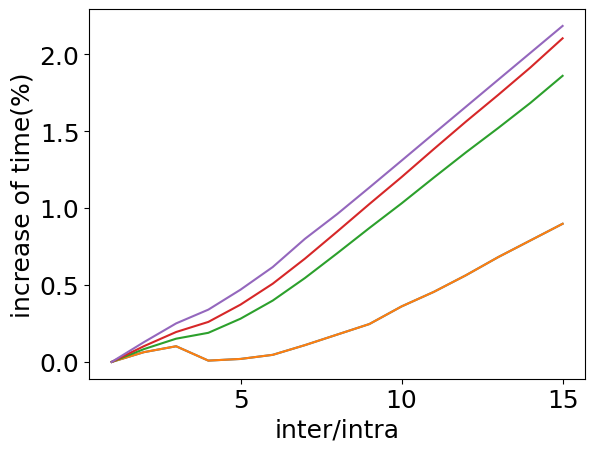

In [ ]:
seam_lst = [8,16]
f_orbs = (2,2,2,2,2,2)
read_epsilon = 1.0
distance = 3.0
epsilon_lst = np.linspace(4.1,4.5,5)
print(epsilon_lst)
epsilon_lst = 10**-(epsilon_lst)
ratio_lst = np.linspace(1, 15, 15)
read_epsilon = 1.0
# ratio_lst = np.concatenate((ratio_lst1, ratio_lst))

path = f"../../H_12_transition/double_packed/inter_transition_{distance+1}/enhanced_epsilon = {read_epsilon}.npy"
directory = os.path.dirname(path)
os.makedirs(directory, exist_ok=True)
for epsilon in epsilon_lst:
    print(f"cur epsilon is {epsilon}")
    prehead = "../../H_12_cluster/"
    uop, all_g = read_uop(distance, read_epsilon, prehead)
    # inter_single, intra_single, inter_control, intra_control, inter_double, intra_double = plot_uop(uop, all_g, 1e-5, seam_lst,epsilon_lst, f_orbs, total=True)
    excitations = create_excitation(uop, all_g, epsilon)
    excitations = orbital_reordering(excitations, f_orbs)
    print(f"excitation has length {len(excitations)}")
    post_gate_lst = np.zeros(len(ratio_lst))
    print(len(ratio_lst))
    for i in range(len(ratio_lst)):
        print(f"current ratio is {ratio_lst[i]}")
        separation = int(2*(ratio_lst[i] - 1))
        print(f"current separation is {separation}")
        bounding_width, placed_tiles_lst = double_pack_with_c(excitations, separation, seam_lst)
        print(f"C bounding width is {bounding_width}")
        post_gate_lst[i] = bounding_width * 25
    post_gate_lst = np.array(post_gate_lst)
    initial_gate = post_gate_lst[0]
    diff = post_gate_lst - initial_gate
    plt.plot(ratio_lst, diff/initial_gate)
    plt.xlabel("inter/intra")
    plt.ylabel("increase of time(%)")
    post_gate_lst.tolist()
    ratio_lst.tolist()
    initial_gate.tolist()
    result = [ratio_lst, post_gate_lst]
    
    np.save(f"../../H_12_transition/double_packed/inter_transition_{distance+1}/enhanced_epsilon = {epsilon:.7f}.npy", result)

<Figure size 1920x1440 with 0 Axes>

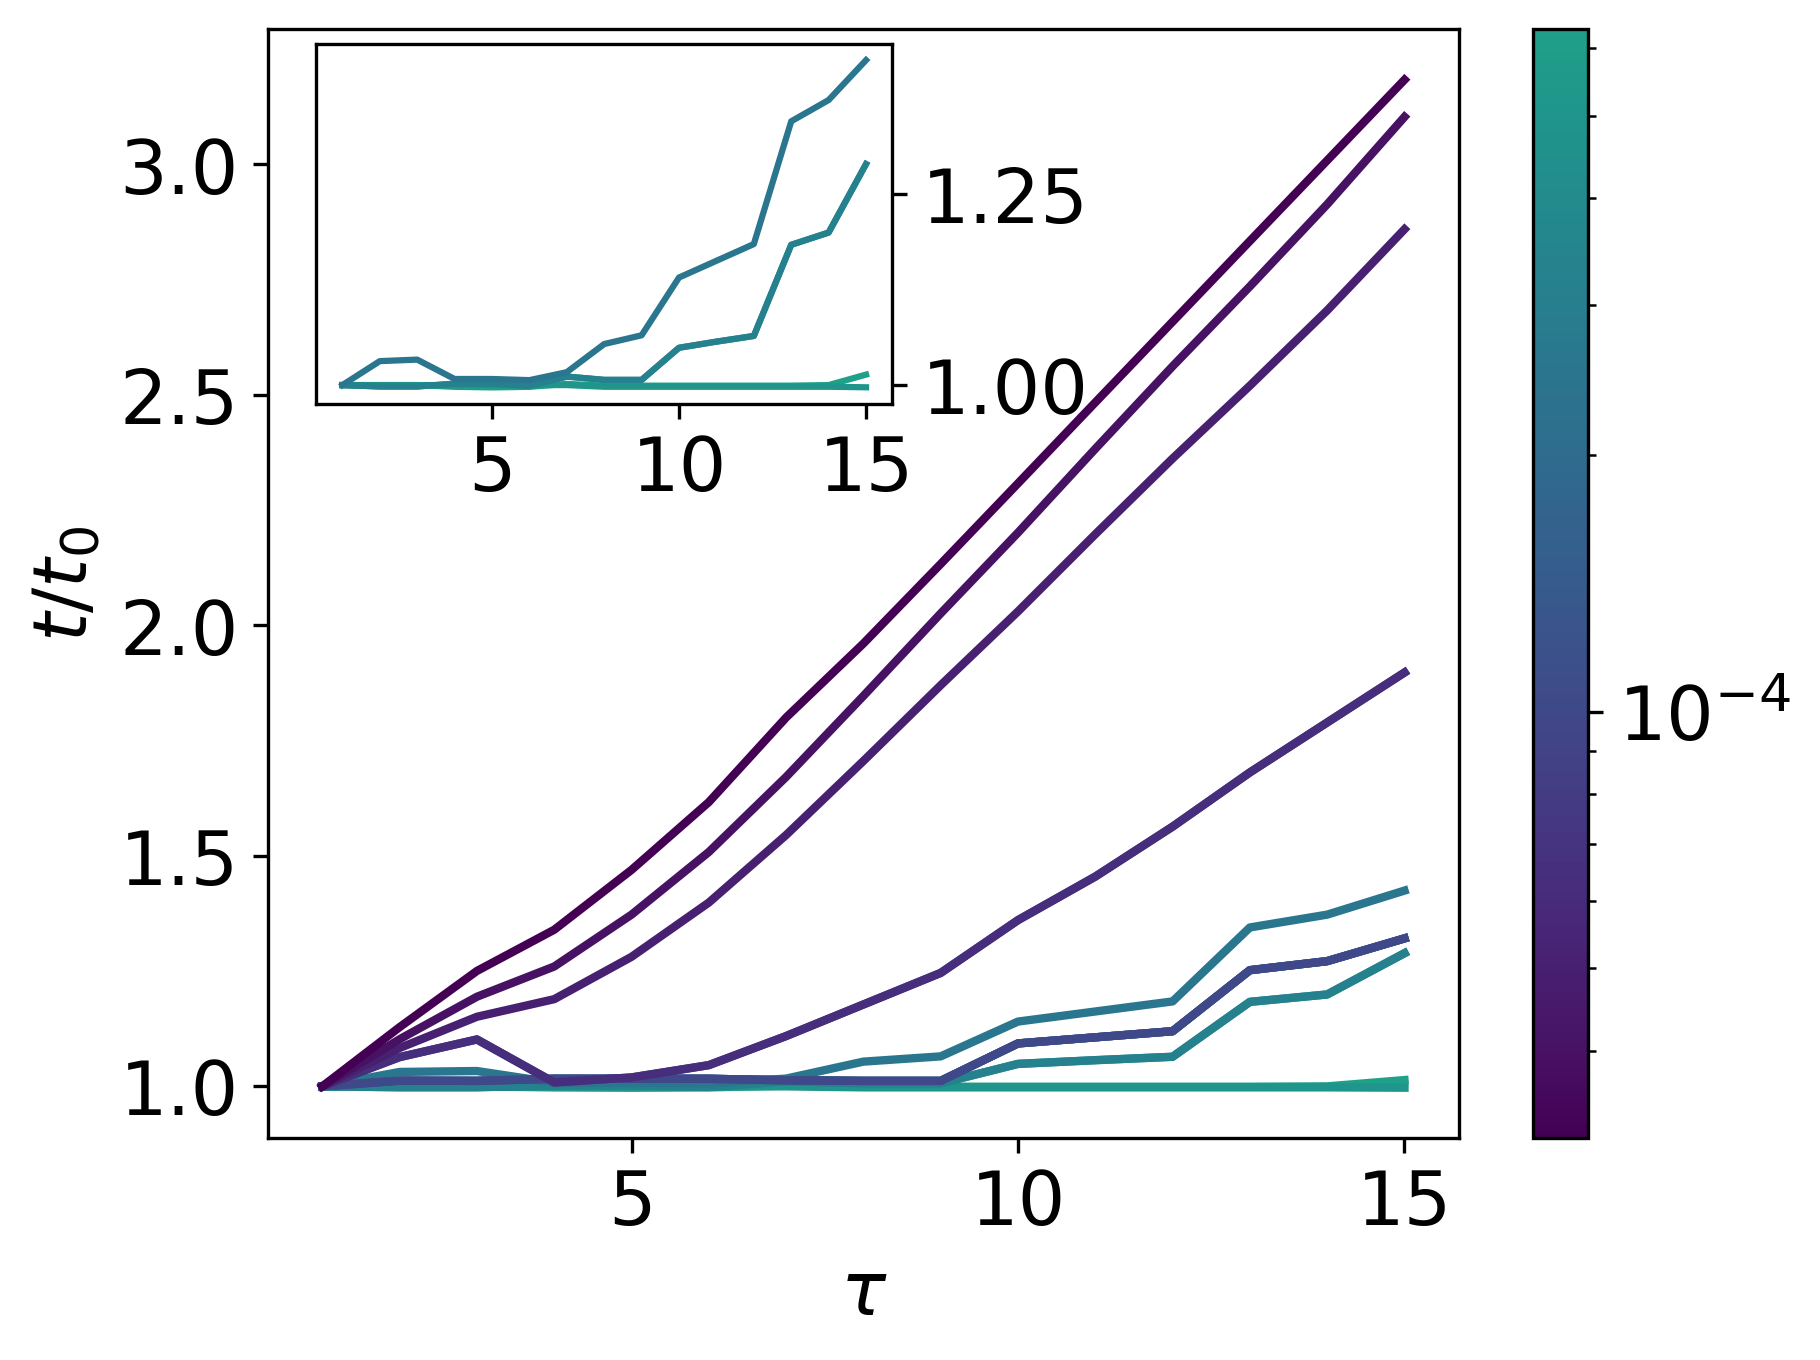

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

plt.figure(dpi=300)  # Default is 100
# epsilon_lst values
epsilon_lst = np.linspace(3.2,4.5,14)
epsilon_lst = 10**-(epsilon_lst)
ratio_lst = np.linspace(1, 15, 15)
distance = 3.0
plt.rcParams.update({'font.size': 18})
# Normalize epsilon values for color mapping
norm = mcolors.LogNorm(vmin=min(epsilon_lst), vmax=max(epsilon_lst) * 10)
cmap = plt.cm.viridis

# Create main figure and axis
fig, ax = plt.subplots(dpi=300)

# Plot for the main plot
for epsilon in epsilon_lst:
    result = np.load(f"../../H_12_transition/double_packed/inter_transition_{distance+1}/enhanced_epsilon = {epsilon:.7f}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate_lst1 = post_gate_lst1[0]

  
    # initial_result = np.load(f"../../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {epsilon:.7f}.npy")
    # post_gate_lst_initial = initial_result[1]
    # initial_gate_lst1 = post_gate_lst_initial[0]
    # print(initial_gate_lst1)

    initial_gate_lst1 = post_gate_lst1[0]

    diff = post_gate_lst1 - initial_gate_lst1
    color = cmap(norm(epsilon))
    ax.plot(ratio_lst1, post_gate_lst1 / initial_gate_lst1, label=f"epsilon = {epsilon}", color=color, linewidth=2)

# Axis labels and title for main plot
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$t/t_0$")
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Manually create the inset axes
inset_ax = plt.axes([0.15, 0.62, 0.3, 0.25])  # [left, bottom, width, height]

# Plot for inset plot (first 2 epsilon values)
for i in range(5):
    plt.rcParams.update({'font.size': 10})
    epsilon = epsilon_lst[i]
    result = np.load(f"../../H_12_transition/double_packed/inter_transition_{distance+1}/enhanced_epsilon = {epsilon:.7f}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]


    # initial_result = np.load(f"../../H_12_transition/inter_transition_{distance+1}/enhanced_epsilon = {epsilon:.7f}.npy")
    # post_gate_lst_initial = initial_result[1]
    # initial_gate_lst1 = post_gate_lst_initial[0]

    initial_gate_lst1 = post_gate_lst1[0]

    diff = post_gate_lst1 - initial_gate_lst1
    color = cmap(norm(epsilon))
    inset_ax.plot(ratio_lst1, post_gate_lst1 / initial_gate_lst1, label=f"epsilon = {epsilon}", color=color, linewidth=1.5)
inset_ax.yaxis.set_ticks_position('right')
# inset_ax.set_yticks([1.01, 1.03])
plt.tick_params(axis='y', labelsize=18)


plt.rcParams.update({'font.size': 18})
# Colorbar setup for main plot
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar to work
cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Epsilon Values')
cbar.ax.set_ylim(min(epsilon_lst), max(epsilon_lst))  # Set colorbar limits
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Final adjustments and showing the plot
  # Update font size
plt.show()
plt.savefig('Fig3a.png')  # or 'figure.pdf'


In [34]:
ratio_lst = np.linspace(1, 15, 15)
distance = 3.0
epsilon_lst = np.linspace(3.2,4.5,14)
epsilon_lst = 10**-(epsilon_lst)
data = np.zeros([len(epsilon_lst), len(ratio_lst)])
for i in range(len(epsilon_lst)):
    epsilon = epsilon_lst[i]
    result = np.load(f"../../H_12_transition/double_packed/inter_transition_{distance+1}/enhanced_epsilon = {epsilon:.7f}.npy")
    ratio_lst1 = result[0]
    post_gate_lst1 = result[1]
    initial_gate = post_gate_lst1[0]
    for j in range(len(ratio_lst)):
        data[i,j] = post_gate_lst1[j]/initial_gate

In [84]:
threshold = np.zeros(len(epsilon_lst))
threshold2 = np.zeros(len(epsilon_lst))
for i in range(len(threshold)):
    found1 = False
    for j in range(1,len(ratio_lst)-1):
        # print(data[i, j] - 1)
        if (data[i, j] - 1)>=0.05 and data[i,j] < data[i,j+1] and not found1:
            # print("found", data[i,j])
            threshold[i] = ratio_lst[j]
            found1 = True
        if not found1:
            threshold[i] = ratio_lst[-1]

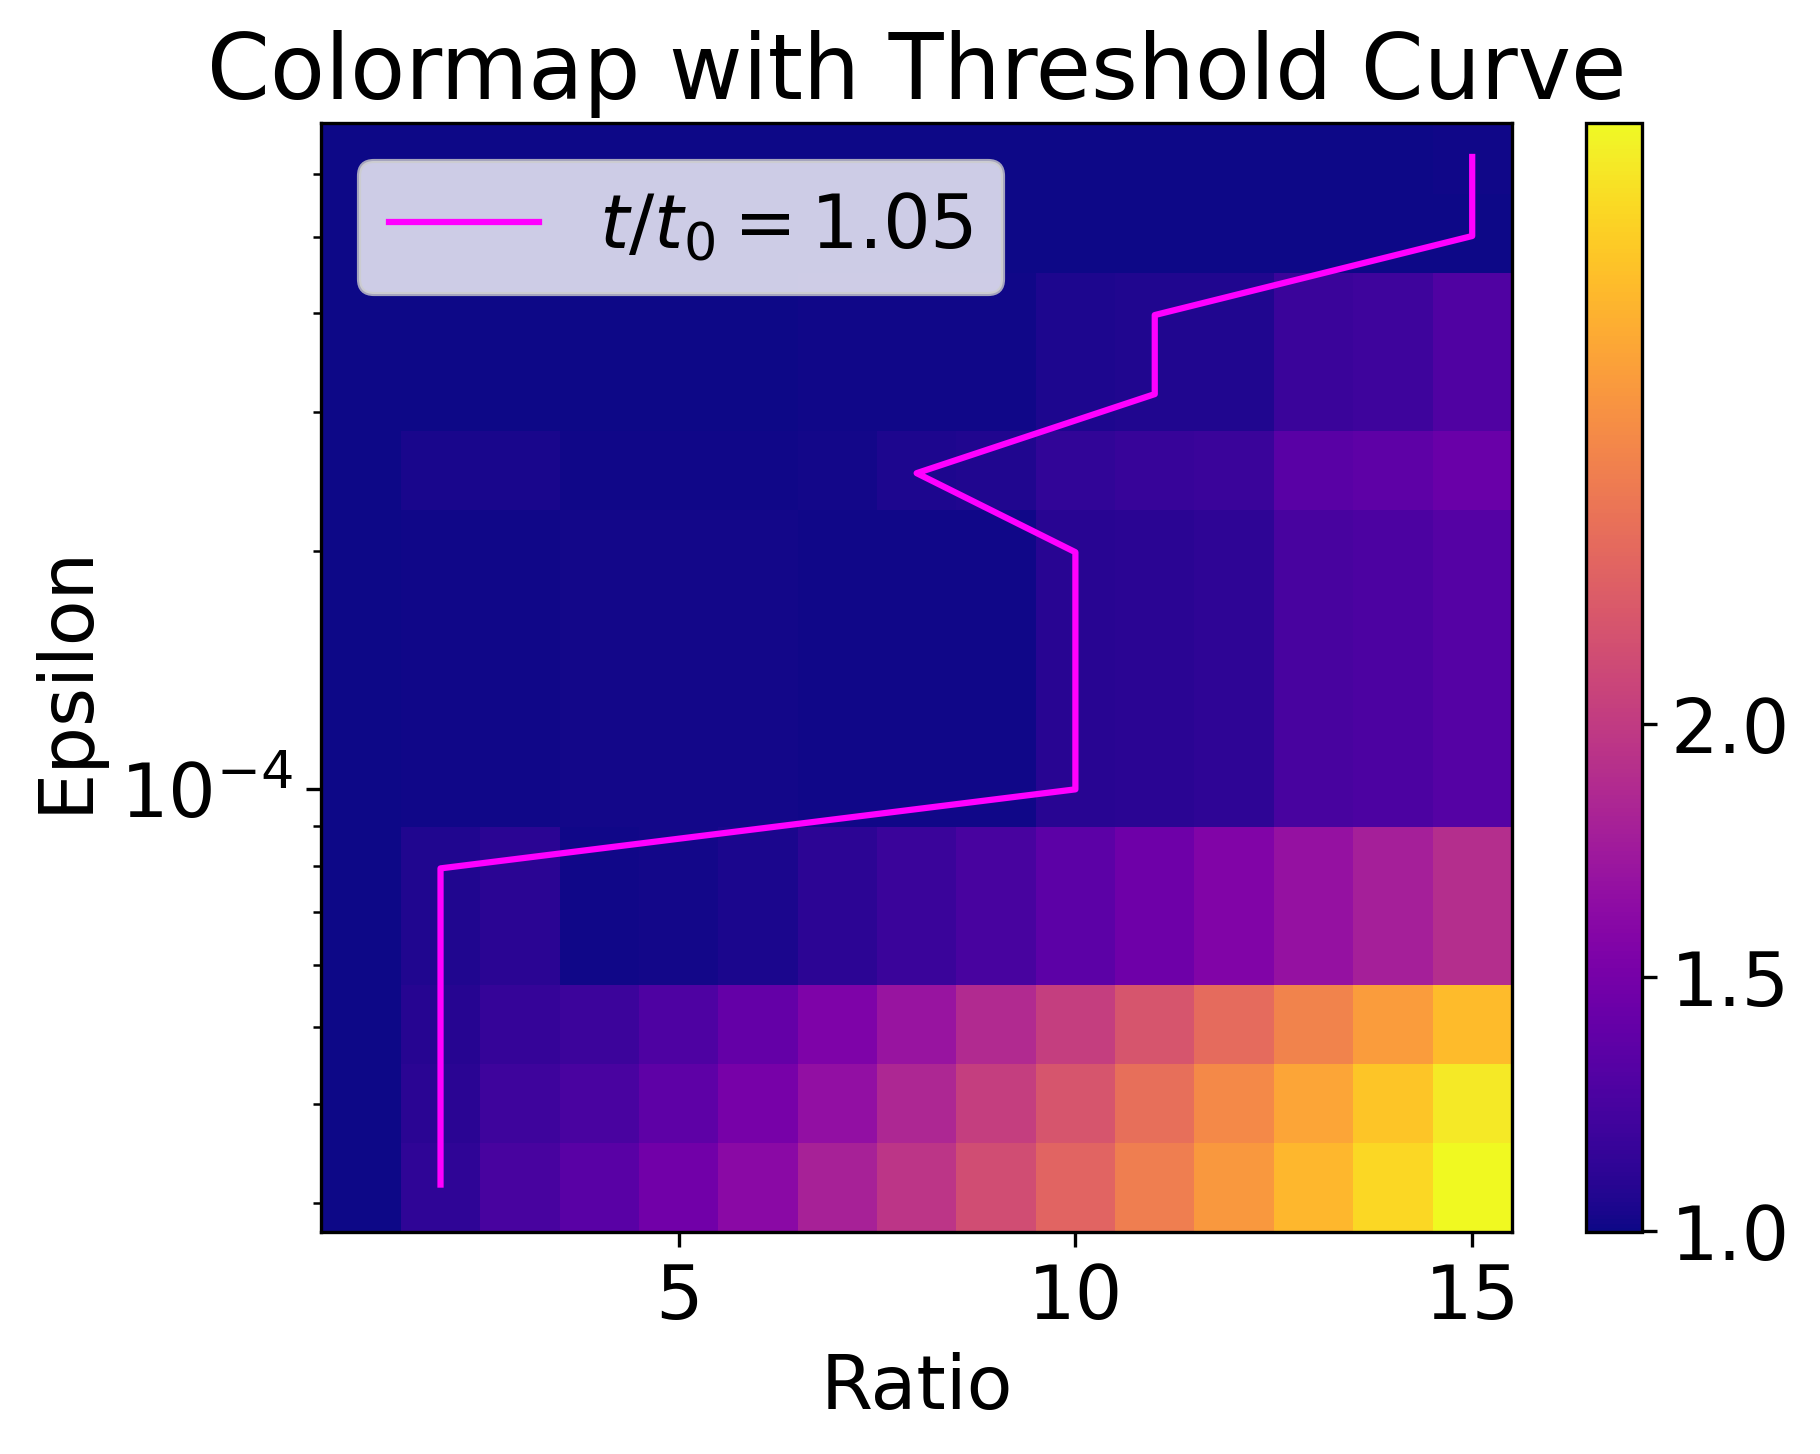

[[1.         1.         1.         0.99771863 0.99695817 0.99771863
  1.00152091 0.99923954 0.99923954 0.99923954 0.99923954 0.99923954
  0.99923954 1.         1.01368821]
 [1.         1.         1.         1.         1.         1.
  1.         0.99782609 0.99782609 0.99782609 0.99782609 0.99782609
  0.99782609 0.99782609 0.99710145]
 [1.         0.99814815 0.99814815 1.00185185 1.00185185 0.99876543
  1.01111111 1.00679012 1.00679012 1.04876543 1.05679012 1.06419753
  1.18333333 1.19938272 1.28888889]
 [1.         0.99814815 0.99814815 1.00185185 1.00185185 0.99876543
  1.01111111 1.00679012 1.00679012 1.04876543 1.05679012 1.06419753
  1.18333333 1.19938272 1.28888889]
 [1.         1.03129657 1.03328366 1.00794834 1.00794834 1.00645802
  1.01689021 1.05365127 1.065077   1.14058619 1.16244411 1.18430204
  1.34475907 1.37257824 1.4247392 ]
 [1.         1.01232877 1.01187215 1.01643836 1.01643836 1.01643836
  1.01324201 1.01187215 1.01187215 1.09315068 1.10639269 1.1196347
  1.25205479 

In [83]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(dpi=300)

# Create meshgrid
x, y = np.meshgrid(ratio_lst, epsilon_lst)

# Plot colormap
c = ax.pcolormesh(x, y, data, cmap='plasma', shading='auto')
ax.set_yscale('log')

# Add colorbar
cb = fig.colorbar(c, ax=ax)
cb.set_ticks([1, 1.5, 2])

# Plot curve: threshold is an array of same length as epsilon_lst
# So we treat epsilon_lst as y-axis, threshold as x-values
ax.plot(threshold, epsilon_lst, color='fuchsia', label=r'$t/t_0 = 1.05$')
# ax.plot(threshold2, epsilon_lst, color='cyan', label='$t/t_0 = 1.1$')


# Labels and title
ax.set_xlabel('Ratio')
ax.set_ylabel('Epsilon')
ax.set_title('Colormap with Threshold Curve')
ax.legend()

plt.show()
print(data)